In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Bollywood dataset
df = pd.read_csv('bollywood.csv')
df.head()


,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
count,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000
mean,75.000000,29.442953,55.667248,3.337920e+06,7877.536913,1207.818792
std,43.156691,28.237981,94.494531,3.504407e+06,12748.047191,1852.692938
min,1.000000,2.000000,0.010000,4.354000e+03,1.000000,1.000000
25%,38.000000,11.000000,8.780000,1.076591e+06,1377.000000,189.000000
50%,75.000000,21.000000,28.000000,2.375050e+06,4111.000000,614.000000
75%,112.000000,35.000000,57.450000,4.550051e+06,9100.000000,1419.000000
max,149.000000,150.000000,735.000000,2.317107e+07,101275.000000,11888.000000


In [5]:
# Select features to define movie "profiles"
features = df[['BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']]

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


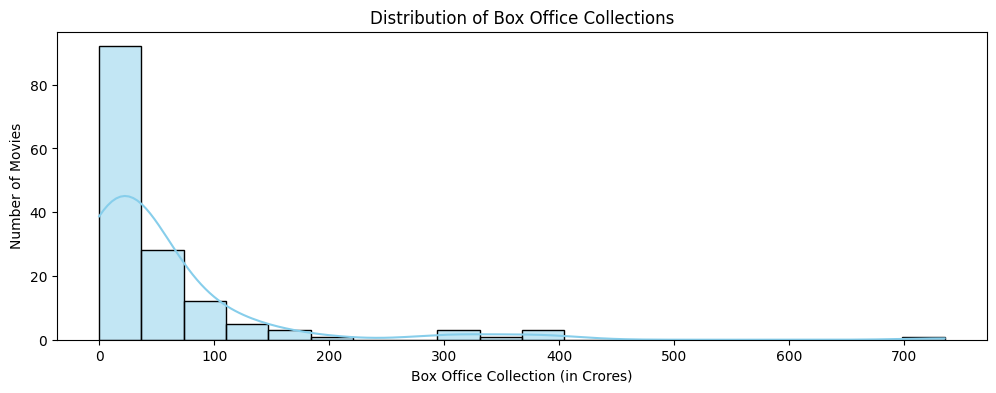

In [14]:
plt.figure(figsize=(12,4))
sns.histplot(df['BoxOfficeCollection'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Box Office Collections')
plt.xlabel('Box Office Collection (in Crores)')
plt.ylabel('Number of Movies')
plt.show()

C:\Users\subra\AppData\Local\Temp\ipykernel_22440\2316207497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index, palette='viridis')


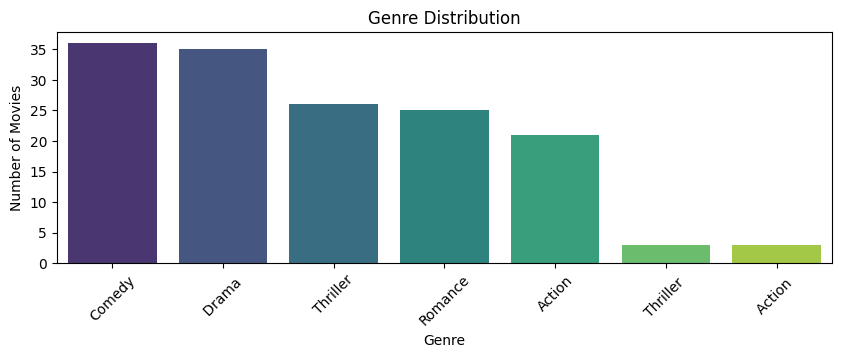

In [16]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index, palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [6]:
# Cosine similarity based on popularity features
similarity = cosine_similarity(features_scaled)
similarity_df = pd.DataFrame(similarity, index=df['MovieName'], columns=df['MovieName'])
similarity_df.head()


MovieName,2 States,Table No. 21,Amit Sahni Ki List,Rajdhani Express,Bobby Jasoos,Citylights,Daawat-E-Ishq,Matru Ki Bijlee Ka Mandola,Dedh Ishqiya,Gangoobai,...,Hawaizaada,Khamoshiyan,Shamitabh,Roy,Badlapur,Dum Laga Ke Haisha,NH10,Dilliwali Zaalim Girlfriend,Hunterrr,Kochadaiiyaan
MovieName,,,,,,,,,,,,,,,,,,,,,
2 States,1.000000,-0.942804,-0.943668,-0.949365,-0.579528,-0.944364,0.218078,-0.939363,-0.932346,-0.949479,...,-0.598150,-0.657929,-0.916911,0.924511,0.733831,-0.384916,0.867926,-0.837434,-0.193816,0.791772
Table No. 21,-0.942804,1.000000,0.998198,0.993071,0.648720,0.975685,-0.051451,0.988189,0.975604,0.993152,...,0.810490,0.766583,0.984403,-0.913290,-0.619102,0.668704,-0.686738,0.929954,0.348677,-0.944089
Amit Sahni Ki List,-0.943668,0.998198,1.000000,0.998108,0.651099,0.971475,-0.047686,0.978044,0.964658,0.998120,...,0.818933,0.761557,0.988587,-0.908190,-0.651697,0.656259,-0.687426,0.933864,0.312023,-0.933291
Rajdhani Express,-0.949365,0.993071,0.998108,1.000000,0.636461,0.969420,-0.070545,0.967284,0.950553,0.999996,...,0.813844,0.740016,0.989888,-0.910924,-0.681982,0.624256,-0.706835,0.925607,0.259633,-0.911923
Bobby Jasoos,-0.579528,0.648720,0.651099,0.636461,1.000000,0.471789,0.663453,0.592019,0.727803,0.634566,...,0.436429,0.972513,0.546009,-0.304817,-0.691265,0.526884,-0.154889,0.871007,0.705782,-0.702007


C:\Users\subra\AppData\Local\Temp\ipykernel_22440\3235753247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_viewed, y='MovieName', x='YoutubeViews', palette='magma')


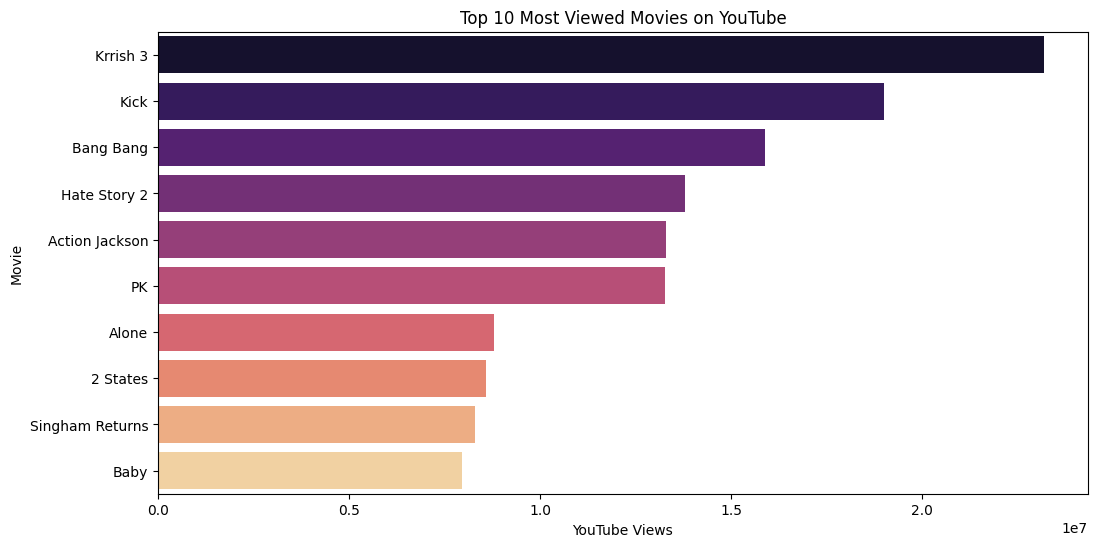

In [17]:
top_viewed = df.sort_values('YoutubeViews', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_viewed, y='MovieName', x='YoutubeViews', palette='magma')
plt.title('Top 10 Most Viewed Movies on YouTube')
plt.xlabel('YouTube Views')
plt.ylabel('Movie')
plt.show()

In [7]:
# Recommend similar movies based on selected features
def recommend(movie_name, top_n=5):
    if movie_name not in similarity_df.columns:
        return "Movie not found."
    sim_scores = similarity_df[movie_name].sort_values(ascending=False)[1:top_n+1]
    return sim_scores

# Example usage
recommend("2 States", top_n=5)


MovieName
Baby         0.988886
Haider       0.984376
Bang Bang    0.963927
Kick         0.956331
Krrish 3     0.949721
Name: 2 States, dtype: float64

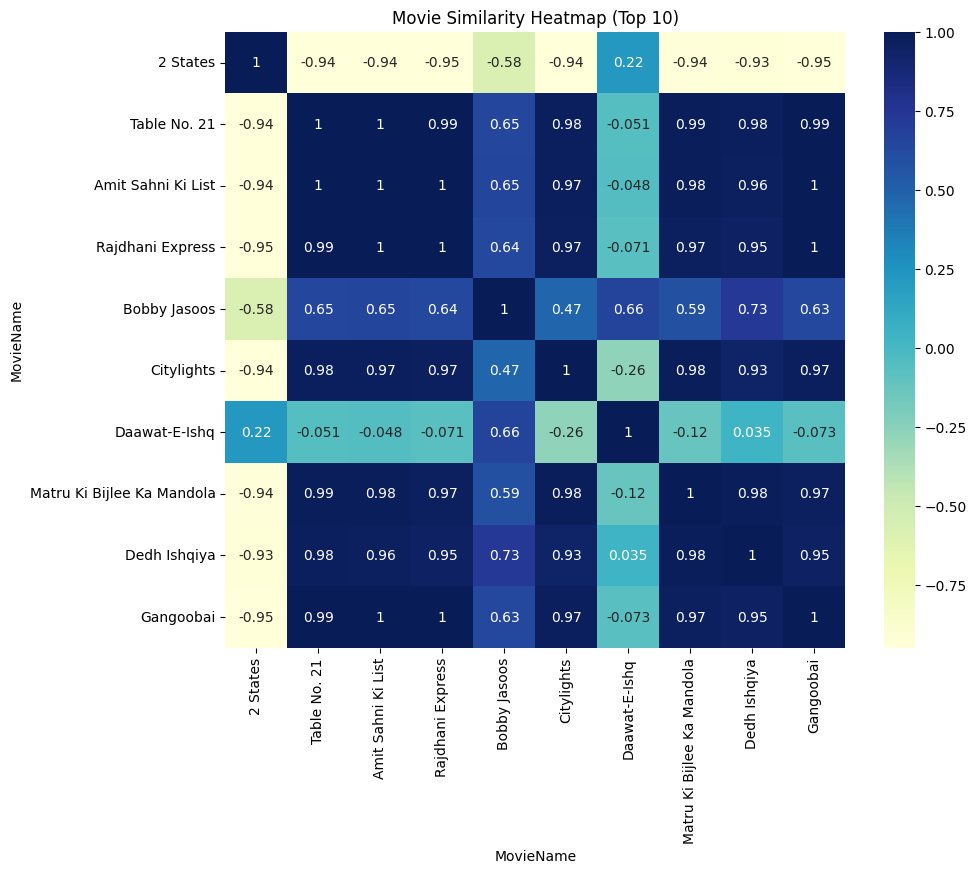

In [11]:
sample_movies = similarity_df.iloc[:10, :10]  # show only top 10 for visualization
plt.figure(figsize=(10,8))
sns.heatmap(sample_movies, annot=True, cmap='YlGnBu')
plt.title('Movie Similarity Heatmap (Top 10)')
plt.show()

